# Import and Setup

In [1]:
from readRinexObs import rinexobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [2]:
data = rinexobs("mah22800.15o")

mah22800.15o is a RINEX 2.11 file.
16.39 seconds for _block2df
8.86 seconds for panel assignments
finished in 27.09 seconds


# Plotting

according to the Andrew Hansen's thesis equations (2.15) and (2.16):

$TEC = (P2-P1)/(f1^2/f2^2 - 1)$

ans

$TEC = -(L2-L1)/(f1^2/f^2 - 1)$

theoretically they should be the same

In [3]:
# sattelites in file
data.items

Int64Index([2, 3, 5, 6, 7, 8, 9, 12, 13, 16, 20, 21, 23, 25, 26, 27, 28, 29,
            30, 31, 32],
           dtype='int64')

In [4]:
# parameters in the file
# https://igscb.jpl.nasa.gov/igscb/data/format/rinex211.txt
# section 10.1.1 says what the letters mean
data.major_axis

Index(['C1', 'L1', 'S1', 'C2', 'L2', 'S2', 'P2', 'C5', 'L5', 'S5'], dtype='object')

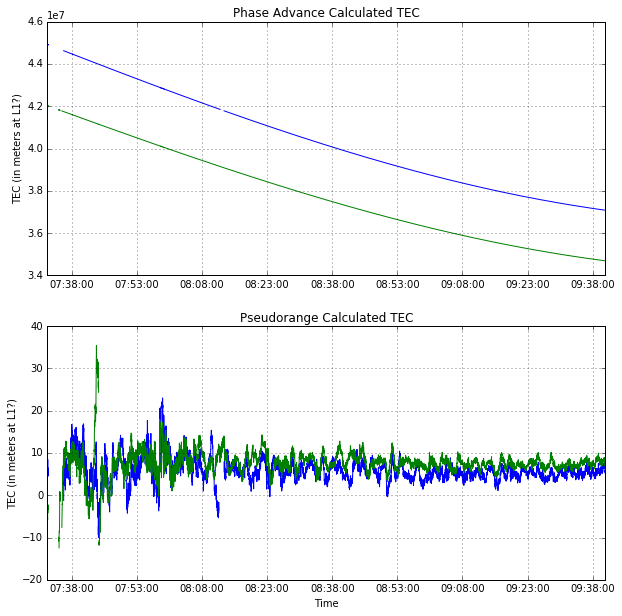

In [11]:
f1 = 1575.42 #MHz
f2 = 1227.6  #MHz
f5 = 1176.45 #MHz

sv_of_interest = 30

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(212)

fmt = DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(fmt)
ax1.autoscale_view()

plt.xlabel('Time')
plt.ylabel('TEC (in meters at L1?)')
plt.title('Pseudorange Calculated TEC')

tec_from_pr1 = (data[:,sv_of_interest,'C2','data']-data[:,sv_of_interest,'C1','data'])/(f1**2/f2**2 - 1)
tec_from_pr2 = (data[:,sv_of_interest,'C5','data']-data[:,sv_of_interest,'C1','data'])/(f1**2/f5**2 - 1)
plt.plot(tec_from_pr1)
plt.plot(tec_from_pr2)
plt.grid()

ax2 = plt.subplot(211, sharex=ax1)

plt.ylabel('TEC (in meters at L1?)')
plt.title('Phase Advance Calculated TEC')

tec_from_ph1 = -1*(data[:,sv_of_interest,'L2','data']-data[:,sv_of_interest,'L1','data'])/(f1**2/f2**2 - 1)
tec_from_ph2 = -1*(data[:,sv_of_interest,'L5','data']-data[:,sv_of_interest,'L1','data'])/(f1**2/f5**2 - 1)
plt.plot(tec_from_ph1)
plt.plot(tec_from_ph2)
plt.grid()
plt.show()

So the TEC is off by a large factor on the pseudorange graph, I'm not sure where that's coming from right now, I followed the equation from the thesis. The difference in pseudorange between the frequencies is very small, is that how its supposed to be and it needs to be multiplied by a constant? or is the data off? The file I used doesn't have P1 and P2, only P2, but I compared P2 to C2 and it is the same, so C1, C2 and C5 should work the same.

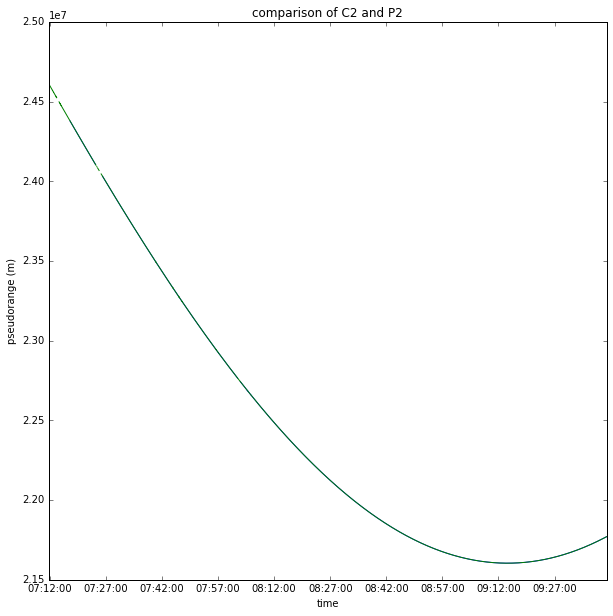

In [107]:
fig2 = plt.figure(figsize = (10,10))

ax = plt.subplot()
ax.xaxis.set_major_formatter(fmt)
ax.autoscale_view()

plt.xlabel('time')
plt.ylabel('pseudorange (m)')
plt.title('comparison of C2 and P2')

plt.plot(data[:,sv_of_interest,'P2','data'])
plt.plot(data[:,sv_of_interest,'C2','data'])
plt.show()